In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

2022-09-07 10:44:16.385253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 10:44:16.385283: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#key='19b7316dcc851d4dc08742ca5a91bf352631d740'
#data = pdr.DataReader(name="AAPL", data_source='yahoo',api_key=key)
#print(data)
#data.to_csv('APPLE.csv')
raw_data=pd.read_csv('APPLE.csv')
raw_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-09-08,40.287498,39.632500,40.215000,39.657501,114446000.0,37.637550
1,2017-09-11,40.512501,39.972500,40.125000,40.375000,126323200.0,38.318520
2,2017-09-12,40.990002,39.692501,40.652500,40.215000,286856000.0,38.166664
3,2017-09-13,39.990002,39.477501,39.967499,39.912498,179629600.0,37.879570
4,2017-09-14,39.849998,39.522499,39.747501,39.570000,95042800.0,37.554516


In [3]:
data.shape

(1257, 7)

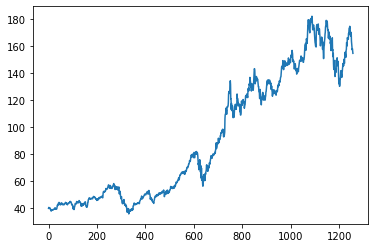

In [4]:
close_data=data['Close'][:len(raw_data['Close'])-1]

#data2.reset_index(drop=True,inplace=True)
plt.plot(close_data)

In [5]:
close_data.head()
len(close_)

1257

In [6]:
Scaler=MinMaxScaler(feature_range=(0,1))
data2=Scaler.fit_transform(np.array(data2).reshape(-1,1))
print(data2)

[[0.0280618 ]
 [0.03296065]
 [0.03186822]
 ...
 [0.83579422]
 [0.82111463]
 [0.8123752 ]]


In [7]:
data2=np.array(data2).reshape(-1,1)
training_size=int(len(data2)*0.6)
test_size=int(len(data2)-training_size)
train_data,test_data=data2[0:training_size:1],data2[training_size:len(data2):1]

print(test_data)

[[0.5275924 ]
 [0.55831699]
 [0.53216694]
 [0.5219937 ]
 [0.54493473]
 [0.54616372]
 [0.52288128]
 [0.51065972]
 [0.48676281]
 [0.50888456]
 [0.52069642]
 [0.48867461]
 [0.49618506]
 [0.52390545]
 [0.54220365]
 [0.53626354]
 [0.54800717]
 [0.55469833]
 [0.52895792]
 [0.55271829]
 [0.52991384]
 [0.54302299]
 [0.54227194]
 [0.55592731]
 [0.60665703]
 [0.58412564]
 [0.58474016]
 [0.58146285]
 [0.56992404]
 [0.54916792]
 [0.55961427]
 [0.55524455]
 [0.54759753]
 [0.54274988]
 [0.54281817]
 [0.55340105]
 [0.51653153]
 [0.54466162]
 [0.50055477]
 [0.49994025]
 [0.51134253]
 [0.54213536]
 [0.56999233]
 [0.56767094]
 [0.55148931]
 [0.54909963]
 [0.57313306]
 [0.57122132]
 [0.57156272]
 [0.57866352]
 [0.5724503 ]
 [0.56316464]
 [0.56732954]
 [0.55845352]
 [0.53462491]
 [0.54363746]
 [0.54950927]
 [0.55333276]
 [0.57012891]
 [0.59518651]
 [0.59764448]
 [0.59668861]
 [0.59197749]
 [0.60221902]
 [0.60652044]
 [0.58876847]
 [0.59873688]
 [0.59306994]
 [0.58876847]
 [0.63041735]
 [0.62993941]
 [0.63

In [8]:
def create_dataset(dataset,time_care=7):
    x_data,y_data=[],[]
    for i in range(len(dataset)-time_care-1):
        x=dataset[i:i+time_care,0]
        y=dataset[(i+time_care),0]
        x_data.append(x)
        y_data.append(y)
        
    return np.array(x_data),np.array(y_data)


In [9]:
time_care=240
x_train,y_train=create_dataset(train_data,time_care)
x_test,y_test=create_dataset(test_data,time_care)

print(x_test)

[[0.5275924  0.55831699 0.53216694 ... 0.9525476  0.9304942  0.93261077]
 [0.55831699 0.53216694 0.5219937  ... 0.9304942  0.93261077 0.91861399]
 [0.53216694 0.5219937  0.54493473 ... 0.93261077 0.91861399 0.88898185]
 ...
 [0.65827437 0.67315868 0.67896225 ... 0.87443885 0.8591449  0.8422805 ]
 [0.67315868 0.67896225 0.67179316 ... 0.8591449  0.8422805  0.8307417 ]
 [0.67896225 0.67179316 0.69534866 ... 0.8422805  0.8307417  0.83579422]]


In [10]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='relu',input_shape=(time_care,1)))
model.add(LSTM(150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(200,return_sequences=True,activation='relu'))
model.add(LSTM(250,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')    

model.summary()

2022-09-07 10:44:20.829735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-07 10:44:20.829766: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-07 10:44:20.829786: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (parrot): /proc/driver/nvidia/version does not exist
2022-09-07 10:44:20.830014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 400, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 400, 150)          150600    
                                                                 
 dropout (Dropout)           (None, 400, 150)          0         
                                                                 
 lstm_2 (LSTM)               (None, 400, 200)          280800    
                                                                 
 lstm_3 (LSTM)               (None, 400, 250)          451000    
                                                                 
 dropout_1 (Dropout)         (None, 400, 250)          0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                6

In [11]:
#x_train[:100]
Model=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=1)


Epoch 1/50
12/12 [==============================] - 18s 1s/step - loss: 0.0366 - val_loss: 0.3404
Epoch 2/50
12/12 [==============================] - 15s 1s/step - loss: 0.0216 - val_loss: 0.1583
Epoch 3/50
12/12 [==============================] - 15s 1s/step - loss: 0.0105 - val_loss: 0.0382
Epoch 4/50
12/12 [==============================] - 15s 1s/step - loss: 0.0038 - val_loss: 1089454315447013418454875413413888.0000
Epoch 5/50
12/12 [==============================] - 15s 1s/step - loss: 0.0028 - val_loss: 0.0738
Epoch 6/50
12/12 [==============================] - 15s 1s/step - loss: 0.0045 - val_loss: 0.0213
Epoch 7/50
12/12 [==============================] - 15s 1s/step - loss: 0.0070 - val_loss: 0.2040
Epoch 8/50
12/12 [==============================] - 15s 1s/step - loss: 0.0064 - val_loss: 0.0107
Epoch 9/50
12/12 [==============================] - 15s 1s/step - loss: 0.0025 - val_loss: 0.0976
Epoch 10/50
12/12 [==============================] - 15s 1s/step - loss: 0.0016 - val

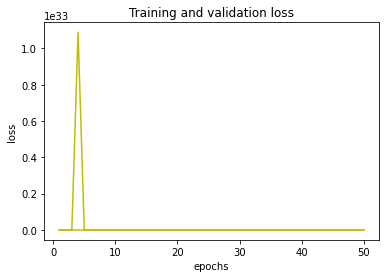

In [16]:
loss=Model.history['loss']
val_loss=Model.history['val_loss']

epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'y',label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [13]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

print(len(train_predict))
print(len(test_predict))
print(train_predict)

4/4 [==============================] - 2s 372ms/step
353
102
[[ 50.907784]
 [ 50.933468]
 [ 50.96325 ]
 [ 50.996887]
 [ 51.034416]
 [ 51.07626 ]
 [ 51.123238]
 [ 51.17699 ]
 [ 51.239983]
 [ 51.31458 ]
 [ 51.402073]
 [ 51.502537]
 [ 51.614113]
 [ 51.736053]
 [ 51.868984]
 [ 52.015213]
 [ 52.17655 ]
 [ 52.351246]
 [ 52.53454 ]
 [ 52.718838]
 [ 52.8941  ]
 [ 53.0473  ]
 [ 53.16568 ]
 [ 53.239735]
 [ 53.264477]
 [ 53.240135]
 [ 53.170208]
 [ 53.060726]
 [ 52.91922 ]
 [ 52.754406]
 [ 52.575325]
 [ 52.390156]
 [ 52.205585]
 [ 52.027046]
 [ 51.858624]
 [ 51.702988]
 [ 51.561768]
 [ 51.436108]
 [ 51.32592 ]
 [ 51.23064 ]
 [ 51.149574]
 [ 51.08197 ]
 [ 51.027164]
 [ 50.983997]
 [ 50.951237]
 [ 50.927643]
 [ 50.912216]
 [ 50.904163]
 [ 50.902897]
 [ 50.908016]
 [ 50.919125]
 [ 50.935486]
 [ 50.95672 ]
 [ 50.98228 ]
 [ 51.011562]
 [ 51.04422 ]
 [ 51.080364]
 [ 51.12061 ]
 [ 51.16596 ]
 [ 51.216858]
 [ 51.273056]
 [ 51.334393]
 [ 51.400345]
 [ 51.470463]
 [ 51.544853]
 [ 51.623608]
 [ 51.706707]
 

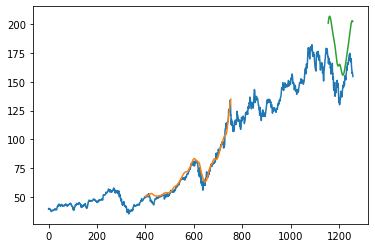

In [19]:
trainPredictPlot=np.empty_like(data2)
trainPredictPlot[:,:]=np.nan
testPredictPlot=np.empty_like(data2)
testPredictPlot[:,:]=np.nan
trainPredictPlot[time_care:len(train_predict)+time_care,:]= train_predict
testPredictPlot[len(train_predict)+2*time_care+1:len(data2)-1,:]= test_predict

plt.plot(Scaler.inverse_transform(data2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()